In [15]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import SE3
from math import pi
import matplotlib.pyplot as plt
from spatialmath.base import *
from spatialmath import *


In [23]:
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=0.2),
        rtb.RevoluteMDH(alpha = pi/2,offset=pi/2),
        rtb.RevoluteMDH(a=0.25),
    ],tool = SE3.Tx(0.28),
    name = "RRR_Robot"
)

q = [0,0,0]
ans = robot.fkine(q)
print(ans)
# robot.plot(q)
# input("Enter")

   0        -1         0         0         
   0         0        -1         0         
   1         0         0         0.73      
   0         0         0         1         



In [17]:
x = []
y = []
z = []


q_values = np.linspace(-pi, pi,50)

for q_1 in q_values:
    for q_2 in q_values:
        for q_3 in q_values:
            q = [q_1,q_2,q_3]
            T = robot.fkine(q)
            position = T.t
            x.append(position[0])  
            y.append(position[1]) 
            z.append(position[2]) 
r_max_xy = np.sqrt(np.max(np.array(x)**2 + np.array(y)**2))
r_min_xy = np.sqrt(np.min(np.array(x)**2 + np.array(y)**2))

r_max_xz = np.sqrt(np.max(np.array(x)**2 + np.array(z)**2))
r_min_xz = np.sqrt(np.min(np.array(x)**2 + np.array(z)**2))

r_max_yz = np.sqrt(np.max(np.array(y)**2 + np.array(z)**2))
r_min_yz = np.sqrt(np.min(np.array(y)**2 + np.array(z)**2))

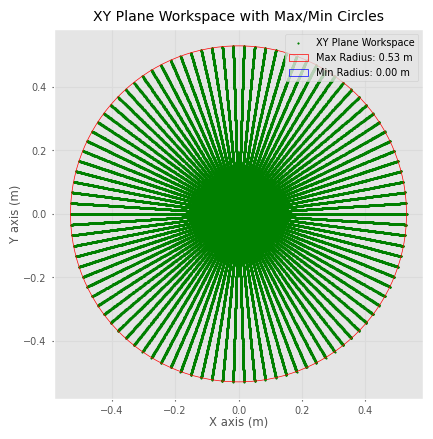

In [18]:

plt.figure()
plt.scatter(x, y, c='green', s=1, label='XY Plane Workspace')
circle_max_xy = plt.Circle((0, 0), r_max_xy, color='r', fill=False, label=f'Max Radius: {r_max_xy:.2f} m')
circle_min_xy = plt.Circle((0, 0), r_min_xy, color='b', fill=False, label=f'Min Radius: {r_min_xy:.2f} m')
plt.gca().add_patch(circle_max_xy)
plt.gca().add_patch(circle_min_xy)
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.title('XY Plane Workspace with Max/Min Circles')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [19]:
output = ((round(r_max_xy, 2), round(r_min_xy, 2)),
          (round(r_max_xz, 2), round(r_min_xz, 2)),
          (round(r_max_yz, 2), round(r_min_yz, 2)))

output

((0.53, 0.0), (0.73, 0.0), (0.73, 0.0))

Max Radius: 0.7296621781756821
Min Radius: 0.008604871657458974


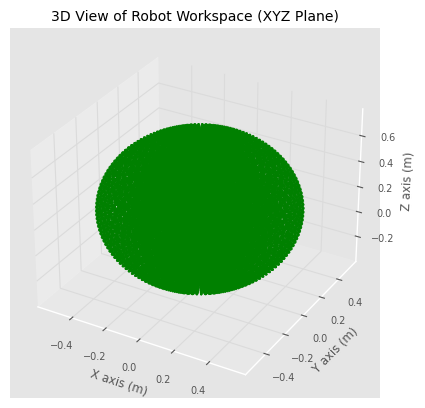

In [20]:

# คำนวณรัศมีมากที่สุดและน้อยที่สุดในระนาบ X-Y
r_max = np.sqrt(np.max(np.array(x)**2 + np.array(y)**2 + np.array(z)**2))
r_min = np.sqrt(np.min(np.array(x)**2 + np.array(y)**2 + np.array(z)**2))

# สร้างกราฟแสดง workspace ในมุมมองสามมิติ (X-Y-Z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# แสดง workspace
ax.scatter(x, y, z, c='green', s=1, label='Workspace')

# กำหนด Label สำหรับแกน X, Y, Z
ax.set_xlabel('X axis (m)')
ax.set_ylabel('Y axis (m)')
ax.set_zlabel('Z axis (m)')
ax.set_title('3D View of Robot Workspace (XYZ Plane)')

print(f"Max Radius: {r_max}")
print(f"Min Radius: {r_min}")

# แสดงกราฟ
plt.show()